In [1]:
# pip install alpha_vantage

In [2]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import os
import datetime
import re
import pandas as pd
import numpy as np
import os

In [3]:
def __help__(func, text=None):
    if text:
        return [x for x in dir(func) if re.match('.*?{}'.format(text),x)]
    else:
        return dir(func) 

In [167]:
tm = datetime.datetime.now()

fmt ='%Y-%m-%d %H:%M:%S'
today = tm.strftime(format=fmt)

# dir(tm)
# strftime',
#  'strptime

In [168]:
ps = tm - datetime.timedelta(days=5)
pst = ps.strftime(format=fmt) 

In [169]:
__help__(tm, "info")

['tzinfo']

In [231]:
!source ./twilio.env

In [7]:
account_sid = os.environ['TWILIO_ACCOUNT_SID']
auth_token = os.environ['TWILIO_AUTH_TOKEN']
AV_KEY=os.environ['AV_KEY']
# client = Client(account_sid, auth_token)

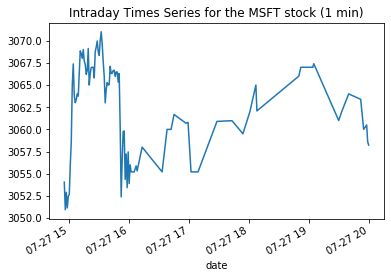

In [11]:
ts = TimeSeries(key=AV_KEY, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='AMZN',interval='1min', outputsize='compact')

data['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()

In [12]:
data['ema_9']= data['4. close'].ewm(span=9).mean()
data['ema_21']= data['4. close'].ewm(span=21).mean()

data['cross'] = data['ema_9'] - data['ema_21']
data['pct'] = data['4. close'].pct_change()
data['change'] = data.apply(lambda x: x['4. close'] if abs(x['pct'])>0.0004 else pd.np.NaN, axis=1)

/Users/icedevil2001/miniconda3/envs/stock/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [13]:
100*0.0004

0.04

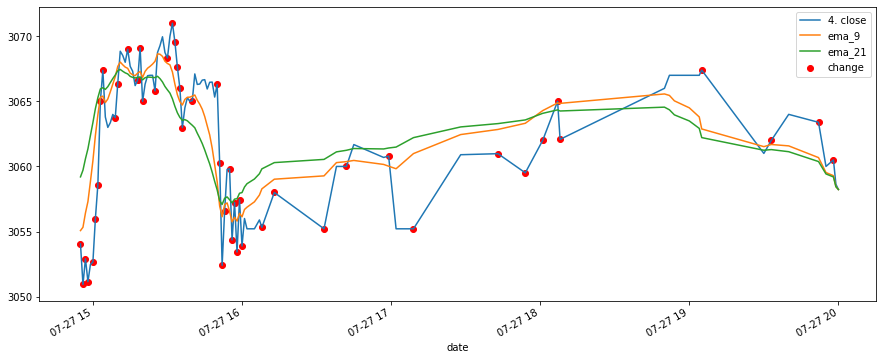

In [14]:
fig = plt.figure(figsize=(15,6))
data['4. close'].plot()
data['ema_9'].plot()
data['ema_21'].plot()


plt.scatter('date','change', data=data.reset_index(), c='r')
plt.legend()

In [15]:
data.reset_index()

,date,1. open,2. high,3. low,4. close,5. volume,ema_9,ema_21,cross,pct,change
0,2020-07-27 20:00:00,3059.0100,3059.01,3058.2300,3058.2300,1426.0,3058.230000,3058.230000,0.000000,NaN,NaN
1,2020-07-27 19:59:00,3059.7900,3059.79,3058.6300,3058.6300,1871.0,3058.452222,3058.439524,0.012698,0.000131,NaN
2,2020-07-27 19:58:00,3061.0000,3061.00,3060.5000,3060.5000,832.0,3059.291475,3059.192749,0.098726,0.000611,3060.5000
3,2020-07-27 19:55:00,3060.0000,3060.00,3060.0000,3060.0000,354.0,3059.531491,3059.424262,0.107229,-0.000163,NaN
4,2020-07-27 19:52:00,3063.3900,3063.39,3063.3900,3063.3900,266.0,3060.679310,3060.375309,0.304001,0.001108,3063.3900
...,...,...,...,...,...,...,...,...,...,...,...
95,2020-07-27 14:59:00,3050.8600,3053.74,3050.5200,3052.4650,4583.0,3058.843963,3062.379331,-3.535368,-0.000066,NaN
96,2020-07-27 14:58:00,3053.6800,3054.47,3051.1500,3051.1500,5632.0,3057.305170,3061.358384,-4.053214,-0.000431,3051.1500
97,2020-07-27 14:57:00,3053.9100,3053.91,3052.0200,3052.9100,3700.0,3056.426136,3060.590282,-4.164145,0.000577,3052.9100
98,2020-07-27 14:56:00,3055.0731,3055.37,3050.9385,3050.9385,5979.0,3055.328609,3059.712777,-4.384168,-0.000646,3050.9385


In [17]:
data


,1. open,2. high,3. low,4. close,5. volume,ema_9,ema_21,cross,pct,change
date,,,,,,,,,,
2020-07-27 20:00:00,3059.0100,3059.01,3058.2300,3058.2300,1426.0,3058.230000,3058.230000,0.000000,NaN,NaN
2020-07-27 19:59:00,3059.7900,3059.79,3058.6300,3058.6300,1871.0,3058.452222,3058.439524,0.012698,0.000131,NaN
2020-07-27 19:58:00,3061.0000,3061.00,3060.5000,3060.5000,832.0,3059.291475,3059.192749,0.098726,0.000611,3060.5000
2020-07-27 19:55:00,3060.0000,3060.00,3060.0000,3060.0000,354.0,3059.531491,3059.424262,0.107229,-0.000163,NaN
2020-07-27 19:52:00,3063.3900,3063.39,3063.3900,3063.3900,266.0,3060.679310,3060.375309,0.304001,0.001108,3063.3900
...,...,...,...,...,...,...,...,...,...,...
2020-07-27 14:59:00,3050.8600,3053.74,3050.5200,3052.4650,4583.0,3058.843963,3062.379331,-3.535368,-0.000066,NaN
2020-07-27 14:58:00,3053.6800,3054.47,3051.1500,3051.1500,5632.0,3057.305170,3061.358384,-4.053214,-0.000431,3051.1500
2020-07-27 14:57:00,3053.9100,3053.91,3052.0200,3052.9100,3700.0,3056.426136,3060.590282,-4.164145,0.000577,3052.9100


In [175]:
# import pandas
# import pandas_datareader.data as web
# import datetime
# import matplotlib.pyplot as plt

# ## https://stackoverflow.com/questions/20526414/relative-strength-index-in-python-pandas

# # Window length for moving average
# window_length = 14

# # Dates
# start = '2010-01-01'
# end = '2013-01-27'

# # Get data
# data = web.DataReader('AAPL', 'yahoo', start, end)
# # Get just the adjusted close
# close = data['Adj Close']
# # Get the difference in price from previous step
# delta = close.diff()
# # Get rid of the first row, which is NaN since it did not have a previous 
# # row to calculate the differences
# delta = delta[1:] 

# # Make the positive gains (up) and negative gains (down) Series
# up, down = delta.copy(), delta.copy()
# up[up < 0] = 0
# down[down > 0] = 0

# # Calculate the EWMA
# roll_up1 = up.ewm(span=window_length).mean()
# roll_down1 = down.abs().ewm(span=window_length).mean()

# # Calculate the RSI based on EWMA
# RS1 = roll_up1 / roll_down1
# RSI1 = 100.0 - (100.0 / (1.0 + RS1))

# # Calculate the SMA
# roll_up2 = up.rolling(window_length).mean()
# roll_down2 = down.abs().rolling(window_length).mean()

# # Calculate the RSI based on SMA
# RS2 = roll_up2 / roll_down2
# RSI2 = 100.0 - (100.0 / (1.0 + RS2))

# # Compare graphically
# plt.figure(figsize=(8, 6))
# RSI1.plot()
# RSI2.plot()
# plt.legend(['RSI via EWMA', 'RSI via SMA'])
# plt.show()

In [18]:
window = 14
delta = data['4. close'].diff()
dUp, dDown = delta.copy(), delta.copy()
dUp[dUp < 0] = 0
dDown[dDown > 0] = 0

RolUp = dUp.rolling(window).mean()
RolDown = dDown.abs().rolling(window).mean()

RS = RolUp / RolDown
RSI = 100.0 - (100.0 / (1.0 + RS))
RSI = RSI.fillna(method='backfill')

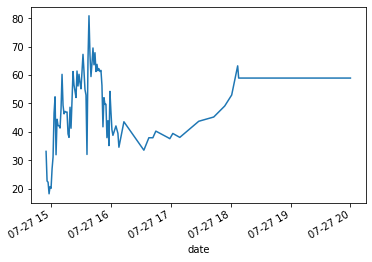

In [20]:
RSI.plot()

In [218]:
RSI1[RSI1>80]

date
2020-07-24 18:59:00     83.018868
2020-07-24 18:57:00     82.692308
2020-07-24 18:55:00     82.692308
2020-07-24 18:54:00     82.692308
2020-07-24 18:43:00    100.000000
2020-07-24 18:42:00    100.000000
2020-07-24 18:40:00     97.727273
2020-07-24 18:38:00     82.608696
2020-07-24 17:00:00     90.599625
Name: 4. close, dtype: float64

In [219]:
RSI1[RSI1<40]

date
2020-07-24 18:24:00    36.111111
2020-07-24 18:23:00    34.210526
2020-07-24 18:22:00    28.260870
2020-07-24 18:21:00    25.490196
2020-07-24 18:20:00    24.074074
Name: 4. close, dtype: float64

In [10]:
# Download the helper library from https://www.twilio.com/docs/python/install
from twilio.rest import Client

# Your Account Sid and Auth Token from twilio.com/console
# DANGER! This is insecure. See http://twil.io/secure
account_sid = os.environ['TWILIO_ACCOUNT_SID']
auth_token = os.environ['TWILIO_AUTH_TOKEN']
client = Client(account_sid, auth_token)

message = client.messages.create(
                              body='Hello there!',
                              from_='whatsapp:+14155238886',
                              to='whatsapp:+16095829044'
                          )

print(message.sid)

SM969604dc6f8649c6bd6410a26dbffe9d


environ{'TERM_SESSION_ID': 'w0t0p1:3C8FA655-890F-4932-BF9B-F071DF8F755A',
        'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.mEVx2lQ0Oq/Listeners',
        'LC_TERMINAL_VERSION': '3.3.9',
        'COLORFGBG': '15;0',
        'ITERM_PROFILE': 'Default',
        'XPC_FLAGS': '0x0',
        'LANG': 'en_GB.UTF-8',
        'PWD': '/Users/icedevil2001/Documents/git/Stock_prediction_snips/notebooks',
        'SHELL': '/bin/zsh',
        'TERM_PROGRAM_VERSION': '3.3.9',
        'TERM_PROGRAM': 'iTerm.app',
        'PATH': '/Users/icedevil2001/miniconda3/envs/stock/bin:/Users/icedevil2001/miniconda3/bin:/Users/icedevil2001/miniconda3/bin:/Users/icedevil2001/miniconda3/condabin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin',
        'LC_TERMINAL': 'iTerm2',
        'COLORTERM': 'truecolor',
        'TERM': 'xterm-color',
        'HOME': '/Users/icedevil2001',
        'TMPDIR': '/var/folders/wl/gxtj7gr176jczz5qf034r6gc0000gn/T/',
        'USER': 'icedevil2001',
        'XPC_SERVICE_NAME': '0

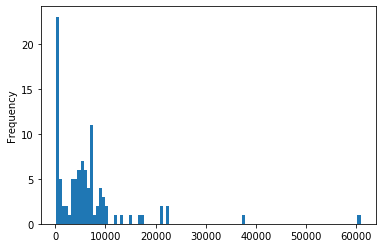

In [28]:
data['5. volume'].plot.hist(bins=100)